In [20]:
using DifferentialEquations, Plots
using DelimitedFiles, DiffEqParamEstim
using ParameterizedFunctions, Optim

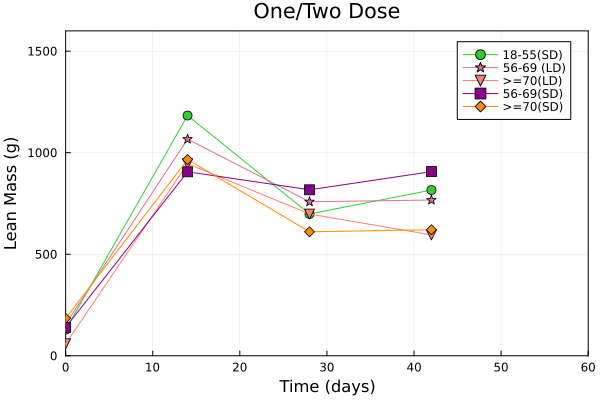

In [21]:
Five_data = readdlm("/Users/suzan/Desktop/Abgroups.txt", '\t','\n');
# Extract Data into lists and arrays
Num_days = size(Five_data)[1]-1
Num_Data = size(Five_data)[2]-1
Five_days = Five_data[2:Num_days+1,1] # store time in days
Five_Mass = Five_data[2:Num_days+1,2:Num_Data+1]
# Five_Exp_Labels = [string(convert(Int,x))*" mg" for x = Five_data[1,2:Num_Data+1]' ];
Five_Exp_Labels = ["18-55(SD)" "56-69 (LD)" ">=70(LD)" "56-69(SD)" ">=70(SD)"];

markershapes = [:circle :star :dtriangle :rect :diamond :utriangle :hex]
markercolors = [:limegreen :palevioletred :salmon :darkmagenta :darkorange]

plot(Five_days, [eachcol(Five_Mass)...], label = Five_Exp_Labels,
    color=markercolors,markersize=5, shape=markershapes, 
    legend=:best, title = "One/Two Dose",
    ylabel="Lean Mass (g)",xlabel="Time (days)", 
    xlims=(0,60), ylims = (0,1600),framestyle = :box,size = (600, 400))

# savefig("/Users/Owner/Desktop/file.pdf")


In [22]:
function vaccine(du, u, p, t)
    
    du[1] = -(0.000001*u[6])*u[1]-0.2*u[1]  # (1):Vaccine, 
    du[2] = 0.035*u[1]-0.055*u[2] # (2):Helper T Cells
    du[3] = 2.55*u[2]-0.13*u[3]-p[1]*u[3]*u[7] # (3):IFNgamma
    du[4] = 1.3*u[2]-0.0008*u[4]-p[2]*u[4]*u[5] # (4):IL6
    du[5] = 0.02*u[2] + p[3]*(u[4]/(p[4]+u[4]))*u[5]-0.06*u[5] #B Plasma cells: very sensitive to 0.02 and 0.06
    du[6] = 7*u[5]-0.06*u[6]-p[5]*u[6]*u[1]#Ab, sensitive to 7 and 0.06
    du[7] = 0.002*u[1]+p[6]*(u[3]/(u[3]+p[7]))*u[7]-0.01*u[7]# cytotoxuc T cells: Sensitive to 0.004

     
end

vaccine (generic function with 1 method)

In [23]:
gamma37 = 0.006 
gamma45 = 0.0001
alpha4 = 0.05#sensitive
th4 = 1000#sensitive
gamma61 =  0.0000001
alpha3 = 0.09
th3 = 600
p = [gamma37, gamma45,alpha4, th4, gamma61, alpha3,th3]
# u0 = [1000; 0.0; 129; 10.0; 10.0; 10.0; 10.0]
u0 = [1000; 0.0; 129; 0.0; 0.0; 10.0; 0.0]
tlin = 0: 200: 1000
tspan1 = (0.0, 56)
DEsys = ODEProblem(vaccine, u0, tspan1,p)
sol = solve(DEsys, reltol=1e-10, abstol=1e-10);

In [24]:
tspan60 = (0.0, 200.0)
# DoseTimes = [28;48]
DEsys = ODEProblem(vaccine, u0, tspan60, p)


condition(u,t,integrator) = t==28
# condition(u,t,integrator) = t in DoseTimes
affect1!(integrator) = integrator.u[1] += 1000
affect2!(integrator) = integrator.u[1] += 0
cb1 = DiscreteCallback(condition,affect1!)
cb2 = DiscreteCallback(condition,affect2!)

sol60 = solve(DEsys, callback=cb1, tstops=28, reltol=1e-18, abstol=1e-18);
sol602 = solve(DEsys, callback=cb2, tstops=28, reltol=1e-18, abstol=1e-18);

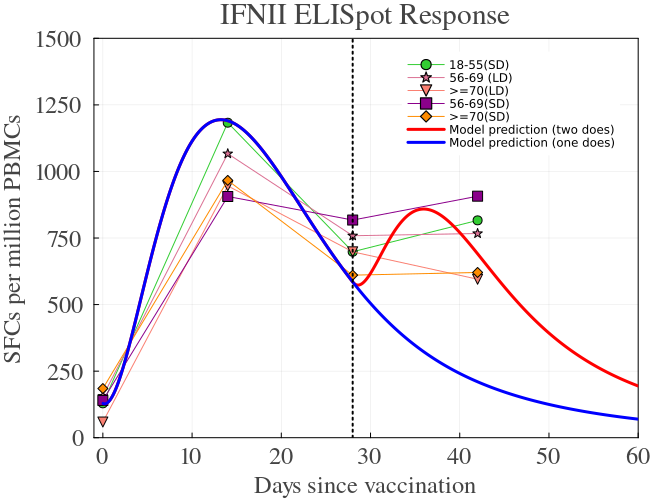

In [25]:
IFN1 = [(t,u[3]) for (u,t) in tuples(sol60)]
IFN2 = [(t,u[3]) for (u,t) in tuples(sol602)]

plot(Five_days, [eachcol(Five_Mass)...], label = Five_Exp_Labels,
    color=markercolors,markersize=5, shape=markershapes, 
    legend=:topright, title = "",
    ylabel="A.U.",xlabel="Time (Days)", 
    xlims=(0,90), ylims = (0,1500),framestyle = :box)

plot!(IFN1, title="Single Dose Concentration Profile",linewidth=3, xaxis = ("Days since vaccination", (-1,60), font(15, "Times")),yaxis = ("", (0,1580), 0:250:1580,font(15, "Times")),
    color="red", label = "Model prediction (two does)",framestyle = :box)

plot!(IFN2, title="IFNII ELISpot Response",linewidth=3, xaxis = ("Days since vaccination", (-1,60), font(15, "Times")),yaxis = ("SFCs per million PBMCs", (0,1500), 0:250:1500,font(15, "Times")),
    color="blue", label = "Model prediction (one does)",framestyle = :box)

p1=plot!([28], seriestype="vline",linestyle = :dot,color="black",linewidth=2,label="",fg_legend = :transparent,titlefont = font("Times", 18),size = (650, 500))
#savefig("/Users/Owner/Desktop/IFN.pdf")

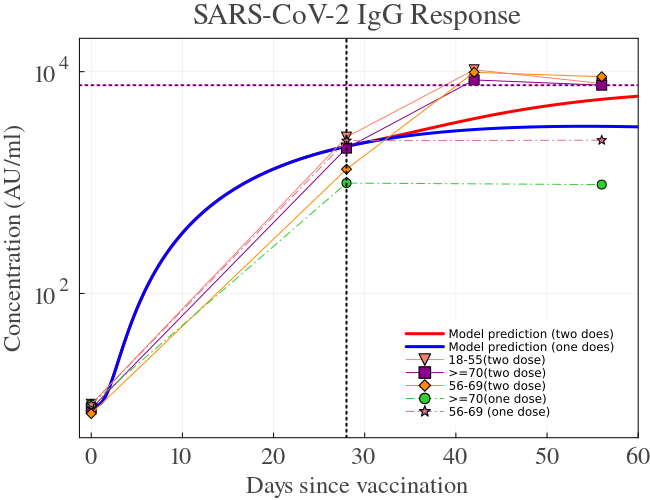

In [26]:
Ab1 = [(t,u[6]) for (u,t) in tuples(sol60)]
Ab2 = [(t,u[6]) for (u,t) in tuples(sol602)]

plot(Ab1, title="Antibody",linewidth=3, xlims=(0,100),
    color="red", label = "Model prediction (two does)", xlabel = "Time (days)", ylabel = "A.U.",framestyle = :box,legend=:bottomright)

plot!(Ab2, title="Antibody",linewidth=3, xlims=(0,100),
    color="blue", label = "Model prediction (one does)", xlabel = "Time (days)", ylabel = "A.U.",framestyle = :box,legend=:bottomright)

################################################################################
Five_data = readdlm("/Users/suzan/Desktop/ABgroup.txt", '\t','\n')
Five_data2 = readdlm("/Users/suzan/Desktop/ABgroup1.txt", '\t','\n')
# Extract Data into lists and arrays
Num_days = size(Five_data)[1]-1
Num_Data = size(Five_data)[2]-1
Five_days = Five_data[2:Num_days+1,1] # store time in days
Five_Mass = Five_data[2:Num_days+1,2:Num_Data+1]
# Five_Exp_Labels = [string(convert(Int,x))*" mg" for x = Five_data[1,2:Num_Data+1]' ];
Five_Exp_Labels = ["18-55(two dose)" ">=70(two dose)" "56-69(two dose)"];

markershapes = [:dtriangle :rect :diamond :utriangle :hex]
markercolors = [:salmon :darkmagenta :darkorange]

plot!(Five_days, [eachcol(Five_Mass)...], label = Five_Exp_Labels,
    color=markercolors,markersize=5, shape=markershapes,title = "One Dose",
    ylabel="Lean Mass (g)",xlabel="Time (days)", 
    xlims=(0,60), ylims = (0,1600),framestyle = :box)
###############################################################################
# Extract Data into lists and arrays
Num_days2 = size(Five_data2)[1]-1
Num_Data2 = size(Five_data2)[2]-1
Five_days2 = Five_data2[2:Num_days2+1,1] # store time in days
Five_Mass2 = Five_data2[2:Num_days2+1,2:Num_Data2+1]
# Five_Exp_Labels = [string(convert(Int,x))*" mg" for x = Five_data[1,2:Num_Data+1]' ];
Five_Exp_Labels2 = [">=70(one dose)" "56-69 (one dose)"];

markershapes2 = [:circle :star]
markercolors2 = [:limegreen :palevioletred]

plot!(Five_days2, [eachcol(Five_Mass2)...], label = Five_Exp_Labels2,
    color=markercolors2,markersize=5, line=(:dashdot),shape=markershapes2, 
     legend=:bottomright,title = "SARS-CoV-2 IgG Response",
     xaxis = ("Days since vaccination", (-1.3,60), font(15, "Times")),yaxis = ("Concentration (AU/ml)", (5,20000), :log, font(15, "Times")),framestyle = :box)
plot!([7553.915], linetype=:hline, linestyle = :dot,color="purple",linewidth=2,label="")
plot!([28], seriestype="vline",linestyle = :dot,color="black",linewidth=2,titlefont = font("Times", 18),label="",fg_legend = :transparent,size = (650, 500))
#savefig("/Users/Owner/Desktop/Ant.pdf")
